# ANN
Artificial Neural Network: Artificial neural networks (ANN) or connectionist systems are computing systems that are inspired by, but not necessarily identical to, the biological neural networks that constitute animal brains.

for practice we use : Telco Customer Churn Dataset.



In [ ]:
# Import Library
import pandas as pd

In [ ]:
# Import data local
from google.colab import files
uploaded = files.upload()

In [ ]:
df_customer= pd.read_csv('churn_transformed_new.csv', sep=',',)

In [ ]:
# Show 10 first Row
df_customer.head()

there is Unamed column, we have to remove it 

In [ ]:
# Remove "Unnamed:O" Column
df_cust1 = df_customer.drop("Unnamed: 0", axis=1)
df_cust1.head()

In [ ]:
# Check the Data Infomation
df_cust1.info()

TotalCharges with data type float64?

In [ ]:
#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()
column_names = df_cust1.columns.tolist()
column_names.remove('Churn')

# Transform all attributes
df_cust1[column_names] = mm_scaler.fit_transform(df_cust1[column_names])
df_cust1.sort_index(inplace=True)
df_cust1.head()

In [ ]:
# Selecting the Feature, by remove the unused feature 
feature = ['Churn']
train_feature = df_cust1.drop(feature, axis=1)

# Set The Target
train_target = df_cust1["Churn"]

In [ ]:
# Show the Feature
train_feature.head(5)

In [ ]:
# Show the Target 
train_target.head(5)

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, shuffle = True, test_size=0.3, random_state=1)

In [ ]:
# Show the training data
X_train.head()

to train the ANN Model.We will use the MLPClassifier from Scikit Learn Library.

In [ ]:
# Import Library
from sklearn.neural_network import MLPClassifier

# Fitting Model
mlp = MLPClassifier(hidden_layer_sizes=(5), activation = 'relu', solver = 'adam',max_iter= 10000, verbose = True, random_state=1)
mlp = mlp.fit(X_train,y_train)

# Prediction to Test Dataset
y_predmlp = mlp.predict(X_test)

In [ ]:
print('Number of Layer =', mlp.n_layers_)
print('Number of Iteration =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)

In [ ]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [ ]:
# Import the metrics class
from sklearn import metrics

In [ ]:
#Confussion Matrix 
cnf_matrixmlp = metrics.confusion_matrix(y_test, y_predmlp)
list1 = ["Actual Churn", "Actual NoChurn"]
list2 = ["Predicted Churn", "Predicted NoChurn"]
pd.DataFrame(cnf_matrixmlp, list1,list2)

In [ ]:
! pip install scikit-plot

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predmlp)

*  True Positive = 683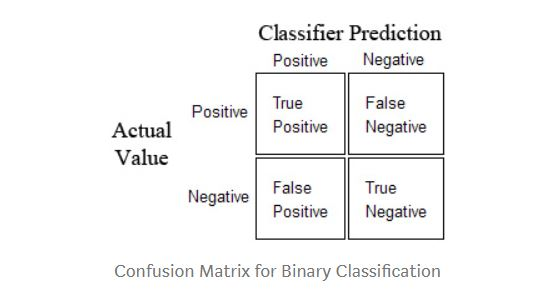 
*  False Positive  = 111
*  False Negative  = 92 
*  True Negatif  = 164 

* True Positive (TP): Outcome where the model correctly predicts the positive class.
* True Negative (TN): Outcome where the model correctly predicts the negative class.
* False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
* False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

In [ ]:
# Show the Accuracy, Precision, Recall, F1, etc. 
acc_mlp = metrics.accuracy_score(y_test, y_predmlp)
prec_mlp = metrics.precision_score(y_test, y_predmlp)
rec_mlp = metrics.recall_score(y_test, y_predmlp)
f1_mlp = metrics.f1_score(y_test, y_predmlp)
kappa_mlp = metrics.cohen_kappa_score(y_test, y_predmlp)

print("Accuracy:", acc_mlp)
print("Precision:", prec_mlp)
print("Recall:", rec_mlp)
print("F1 Score:", f1_mlp)
print("Cohens Kappa Score:", kappa_mlp)